<h1 align="center">Visualizing Presidential Impact</h1> 

In reponse to Jon Schwabish's January 2017 post, he requested ideas for how to better visualize this graphic: 

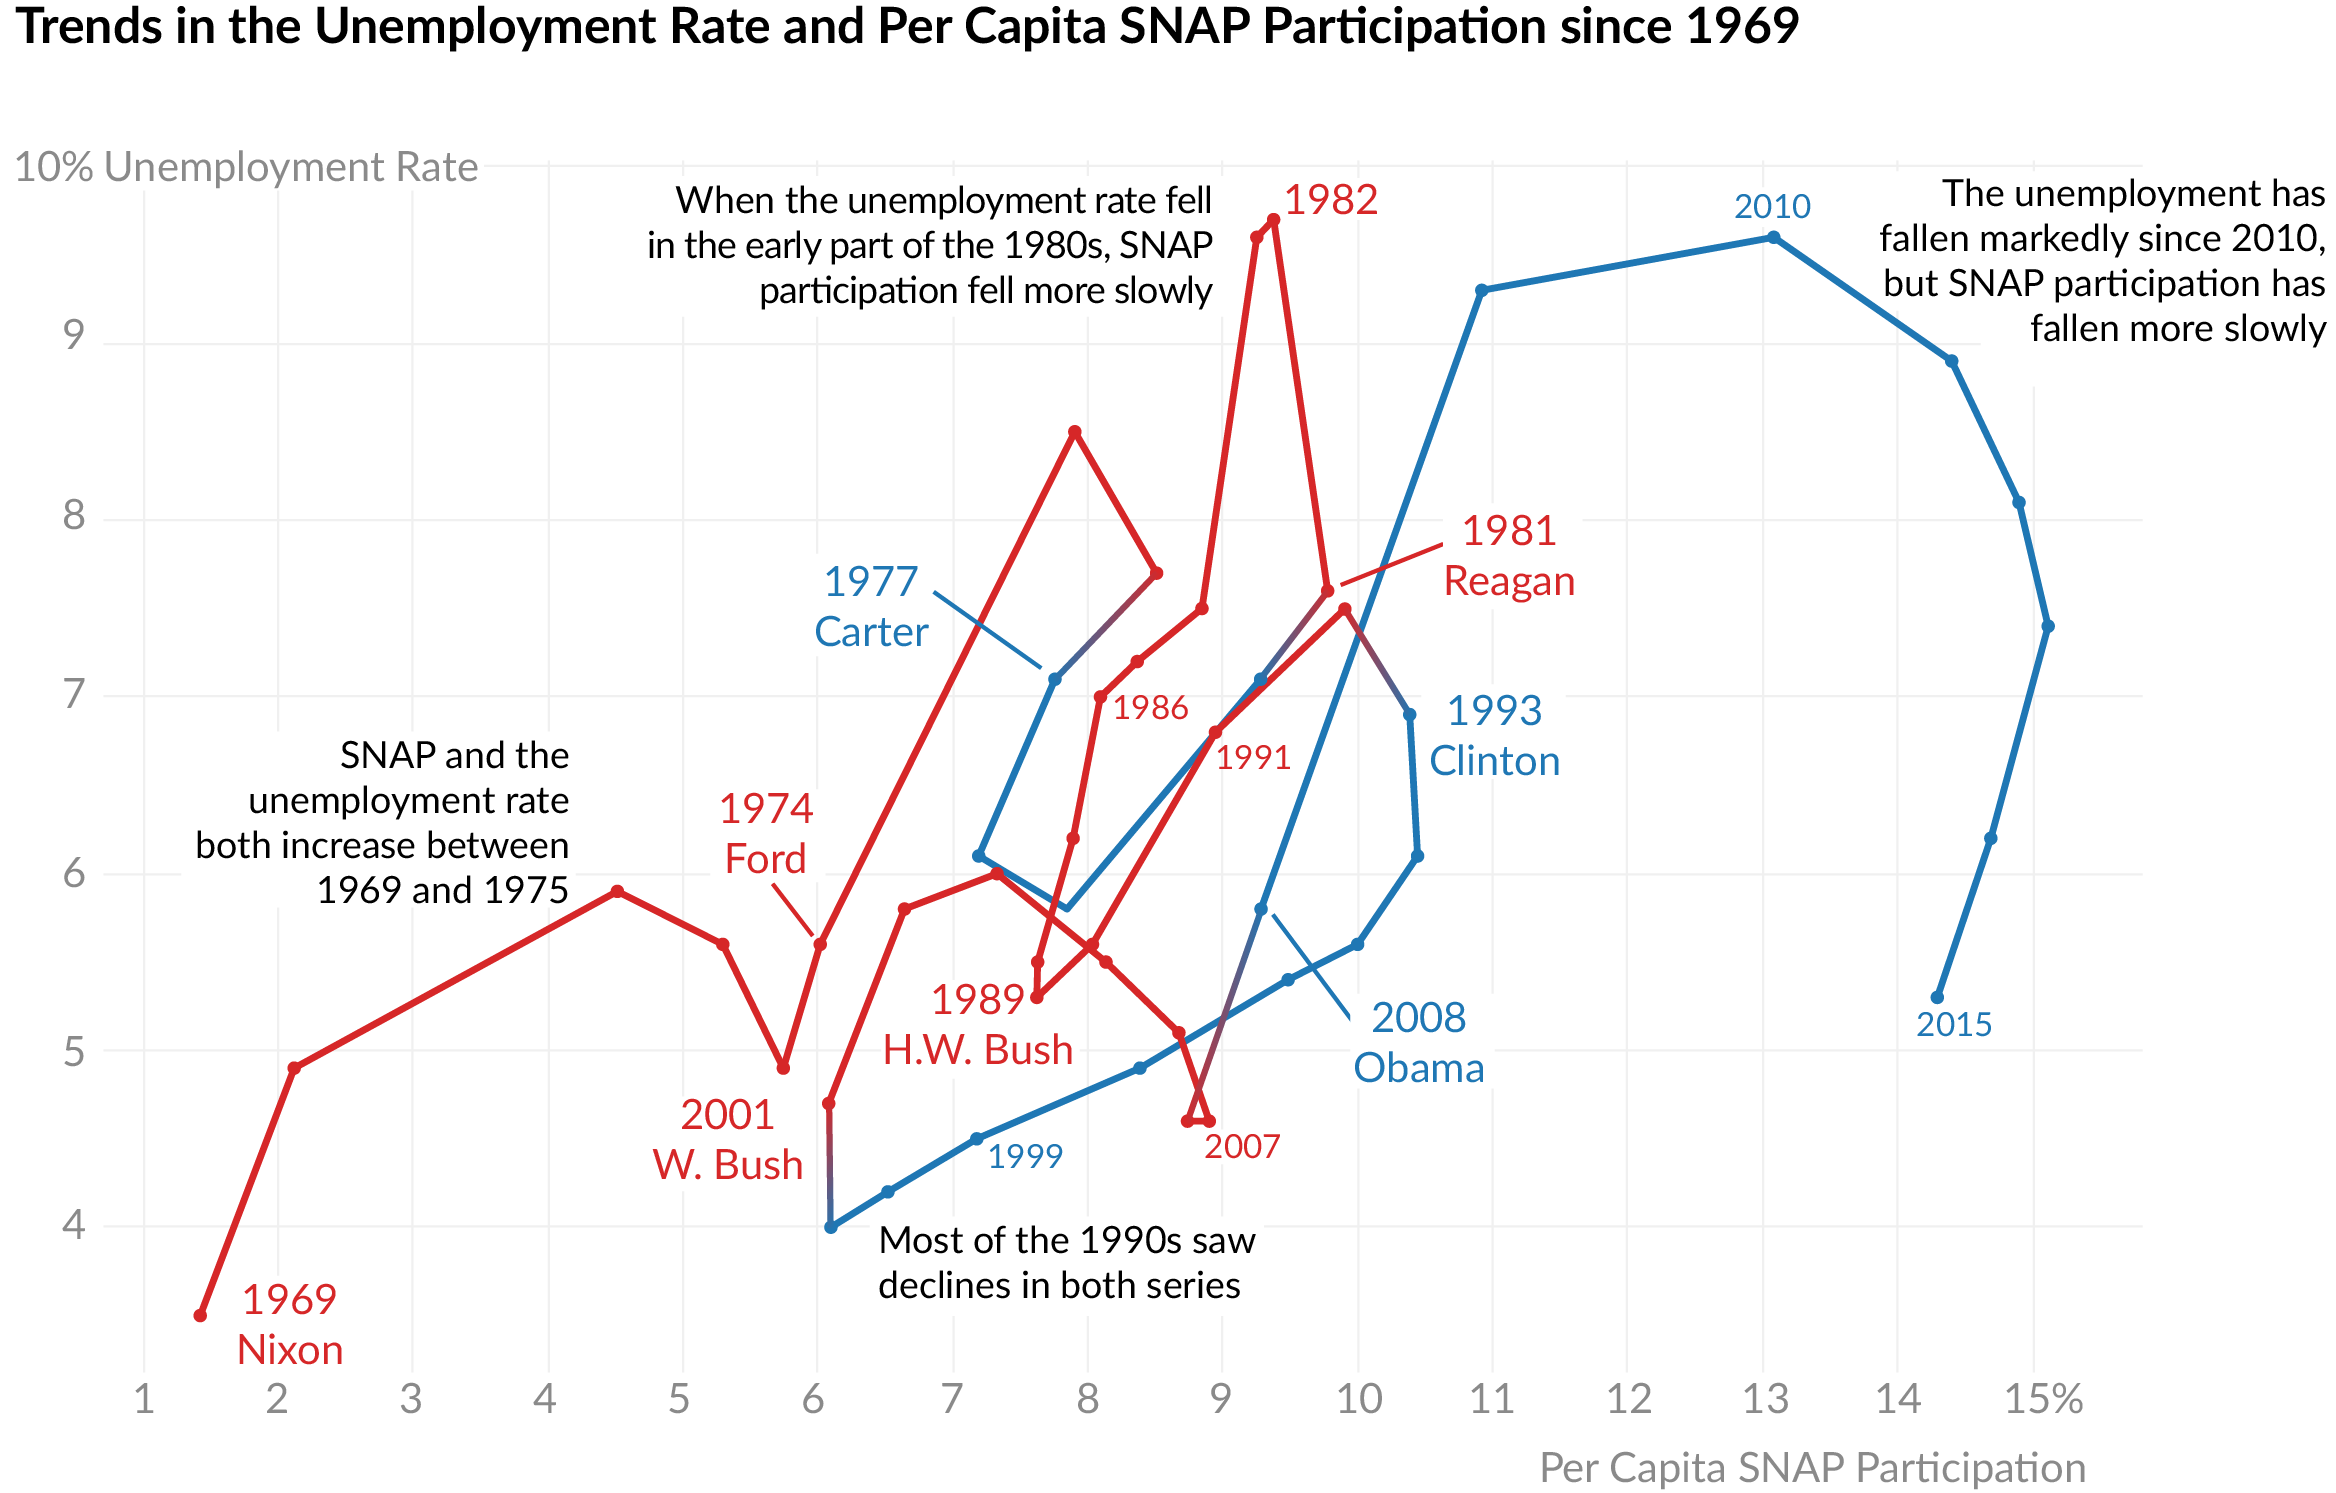

In [1]:
from IPython.display import Image
Image('original_schwabish_graphic.png')

Jon's description of this graphic:
"As part of that post, I showed the relationship between the unemployment rate and participation in the Supplemental Nutrition Assistance Program (SNAP; formerly known as food stamps). That graph–a connected scatterplot–was, admittedly, a bit of a mess (though I thought the annotation was quite nice), but I didn’t want to do side-by-side line charts because the correlation is important."

https://policyviz.com/hmv_post/messy-connected-scatterplot/   
http://www.urban.org/2016-analysis/why-presidents-have-limited-influence-over-economy


## My Revision 

I thought the most interesting way this graphic could be enhanced was through data manipulation. When considering a President's impact on the economy, nothing he does will have an immediate impact. Legislation takes time to pass, and frequently does begin to have effects until years later. While a president being in office may correlate with particular economic events, these economic lags make assessing causation incredible difficult. In my visuals, I will attempt to visualize the impact of economic lag.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('presidential_impact.csv')

In [4]:
for x in range(1,4):
    #creates pct change columns in our pandas dataframes
    df['unemployment' + str(x)] = df['Unemployment'].pct_change(periods=x)
    df['SNAPperCap' + str(x)] = df['SNAPperCap'].pct_change(periods=x)

df=df.rename(columns = {'Unemployment':'unemployment0', 'SNAPperCap': 'SNAPperCap0'})
df.tail()

,Year,President,Party,unemployment0,SNAPperCap0,unemployment1,SNAPperCap1,unemployment2,SNAPperCap2,unemployment3,SNAPperCap3
42,2011,Obama,D,8.9,14.398946,-0.072917,0.100807,-0.043011,0.318951,0.534483,0.551441
43,2012,Obama,D,8.1,14.897741,-0.089888,0.034641,-0.156250,0.138940,-0.129032,0.364641
44,2013,Obama,D,7.4,15.113932,-0.086420,0.014512,-0.168539,0.049655,-0.229167,0.155468
45,2014,Obama,D,6.2,14.688874,-0.162162,-0.028124,-0.234568,-0.014020,-0.303371,0.020135
46,2015,Obama,D,5.3,14.292259,-0.145161,-0.027001,-0.283784,-0.054365,-0.345679,-0.040643


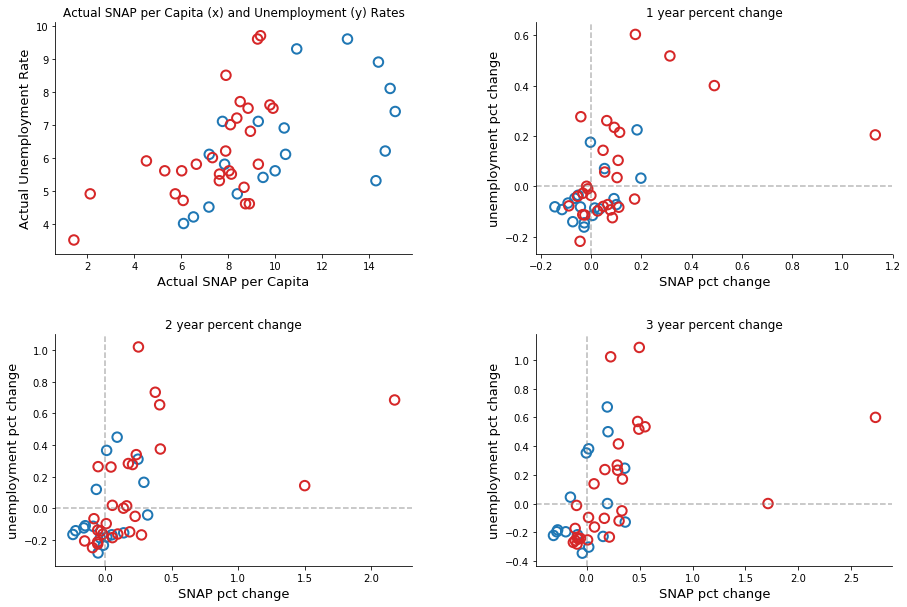

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
fig.subplots_adjust(hspace = .35, wspace=.35)
axs = axs.ravel()

colors = {'D':'C0', 'R':'C3'}
titles = {0: "Actual SNAP per Capita (x) and Unemployment (y) Rates", 
          1:"1 year percent change",
          2:"2 year percent change",
          3:"3 year percent change"}

fontsize = 13

for i in range(0,4):
    for party in ['D', 'R']:
        
        # to correctly assign pct change to the right party, pandas "Shift" function is used. This assigns 
        # 2009 to GW Bush for a 1 year pct change, 2010 to GW Bush for a 2 year pct change, and 2011 to 
        # GW Bush for a 3 year pct change
        x = df['SNAPperCap' + str(i)][df.Party.shift(i) == party]
        y = df['unemployment' + str(i)][df.Party.shift(i) == party]

        # plot your data
        axs[i].scatter(x,y, s=90, linewidth=2.0,edgecolors = colors[party], facecolors='none')
        
        #format the plot
        axs[i].set_title(titles[i])
        axs[i].spines["top"].set_visible(False)    
        axs[i].spines["right"].set_visible(False)
        axs[i].set_xlabel('SNAP pct change', fontsize=fontsize)
        axs[i].set_ylabel('unemployment pct change', fontsize=fontsize)
        
        
        if i != 0:
            axs[i].axhline(0, color='C7', linestyle='--' ,alpha=0.3)
            axs[i].axvline(0, color='C7',linestyle='--',alpha=0.3)
        else:
            axs[i].set_xlabel('Actual SNAP per Capita', fontsize=fontsize)
            axs[i].set_ylabel('Actual Unemployment Rate', fontsize=fontsize)

In [6]:
# Save the full figure...
fig.savefig('presidential_influence.png')